In [1]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import HTML
import numpy as np
from sklearn import preprocessing
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, GlobalAveragePooling1D, Dense, SpatialDropout1D, LSTM, Dropout
from keras.optimizers import SGD
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

In [2]:
# Define max dictionary words and max lenght of each review
num_words = 12000
max_phrase_len = 256

In [3]:
# Import the IMDB movie reviews
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Display number of training and testing data
print("Training entries: {}, labels: {}".format(len(X_train), len(y_train)))

17464789/17464789 [==============================] - 0s 0us/step
Training entries: 25000, labels: 25000


In [4]:
# Insert special words (START, PAD, UNKNOWN, UNUSED)
INDEX_FROM=3
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}

1641221/1641221 [==============================] - 0s 0us/step


In [5]:
# Negative review example
print(X_train[2])
print(' '.join(id_to_word[id] for id in X_train[2] ))

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they ac

In [6]:
# Positive review example
print(X_train[0])
print(' '.join(id_to_word[id] for id in X_train[0] ))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
<START> this film was just brilliant casting location sc

In [7]:
# Display the target label
# 0 = negative, 1 = positive
print(y_train[0])

1


In [8]:
# Align the lenght of each training and test review to 256 by adding PAD words

X_train = pad_sequences(
    X_train,
    value=word_to_id["<PAD>"],
    padding='post',
    maxlen=max_phrase_len
)
X_test = pad_sequences(
    X_test,
    value=word_to_id["<PAD>"],
    padding='post',
    maxlen=max_phrase_len
)

In [9]:
len(X_train[0]), len(X_train[1])

(256, 256)

In [10]:
# Display the result after the Padding process (words)
print(' '.join(id_to_word[id] for id in X_train[1] ))

<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then <PAD> <PAD> <PAD> <P

In [11]:
# Display the result after the Padding process (tokenized)
print(X_train[1])

[    1   194  1153   194  8255    78   228     5     6  1463  4369  5012
   134    26     4   715     8   118  1634    14   394    20    13   119
   954   189   102     5   207   110  3103    21    14    69   188     8
    30    23     7     4   249   126    93     4   114     9  2300  1523
     5   647     4   116     9    35  8163     4   229     9   340  1322
     4   118     9     4   130  4901    19     4  1002     5    89    29
   952    46    37     4   455     9    45    43    38  1543  1905   398
     4  1649    26  6853     5   163    11  3215 10156     4  1153     9
   194   775     7  8255 11596   349  2637   148   605     2  8003    15
   123   125    68     2  6853    15   349   165  4362    98     5     4
   228     9    43     2  1157    15   299   120     5   120   174    11
   220   175   136    50     9  4373   228  8255     5     2   656   245
  2350     5     4  9837   131   152   491    18     2    32  7464  1212
    14     9     6   371    78    22   625    64  1

In [12]:
# Create the RNN Neural Network

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_phrase_len))
model_lstm.add(SpatialDropout1D(0.1))
model_lstm.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(2, activation = 'softmax'))

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 32)           384000    
                                                                 
 spatial_dropout1d (Spatial  (None, 256, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 256, 32)           8320      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [13]:
# Compile the RNN model

model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [14]:
# Fit our model

history = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 20,
    batch_size = 64
)

Epoch 1/20
313/313 [==============================] - 141s 431ms/step - loss: 0.6684 - accuracy: 0.5592 - val_loss: 0.7502 - val_accuracy: 0.7254
Epoch 2/20
313/313 [==============================] - 133s 424ms/step - loss: 0.6655 - accuracy: 0.5930 - val_loss: 0.6856 - val_accuracy: 0.5354
Epoch 3/20
313/313 [==============================] - 131s 420ms/step - loss: 0.6649 - accuracy: 0.5932 - val_loss: 0.5735 - val_accuracy: 0.7304
Epoch 4/20
313/313 [==============================] - 133s 425ms/step - loss: 0.5183 - accuracy: 0.7520 - val_loss: 0.5477 - val_accuracy: 0.7810
Epoch 5/20
313/313 [==============================] - 139s 444ms/step - loss: 0.4650 - accuracy: 0.8084 - val_loss: 0.4727 - val_accuracy: 0.8068
Epoch 6/20
313/313 [==============================] - 141s 449ms/step - loss: 0.4295 - accuracy: 0.8238 - val_loss: 0.6144 - val_accuracy: 0.6594
Epoch 7/20
313/313 [==============================] - 139s 444ms/step - loss: 0.4610 - accuracy: 0.8030 - val_loss: 0.5391 -

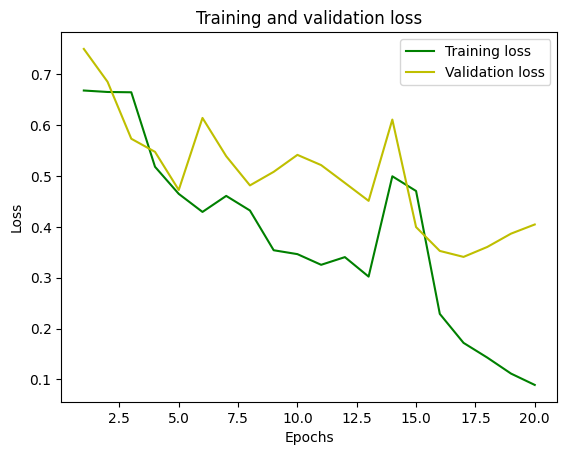

In [15]:
#Plot the Loss
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

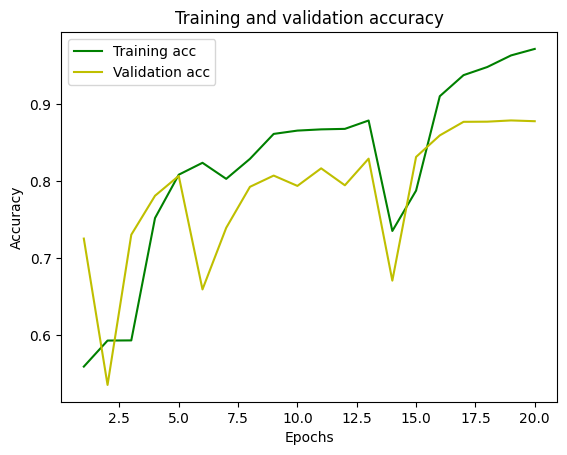

In [16]:
#Plot the accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#Save the model to disk
model_lstm.save('finalized_model_sentiment.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Display the review to be predicted
# 0=Negative
# 1=Positive
review_index = 2
y_test[review_index]

1

In [19]:
#Sentiment Prediction
#Make the inference by using the fitted RNN model
pred = model_lstm.predict(X_test[review_index].reshape(-1,256))
print("\n\033[1mPredicted sentiment [0=Negative - 1=Positive]: %.0f"%pred.argmax(),"\033[0m \n ")
print("Predicted probability array:")
print(pred)

1/1 [==============================] - 1s 698ms/step

Predicted sentiment [0=Negative - 1=Positive]: 1  
 
Predicted probability array:
[[0.00696994 0.99303013]]


In [20]:
# Display the review to be predicted
# 0=Negative
# 1=Positive

review_index = 3
y_test[review_index]

0

In [21]:
#Sentiment Prediction
#Make the inference by using the fitted RNN model
pred = model_lstm.predict(X_test[review_index].reshape(-1,256))

print("\n\033[1mPredicted sentiment [0=Negative - 1=Positive]: %.0f"%pred.argmax(),"\033[0m \n ")
print("Predicted probability array:")
print(pred)

1/1 [==============================] - 0s 59ms/step

Predicted sentiment [0=Negative - 1=Positive]: 0  
 
Predicted probability array:
[[0.9229685  0.07703151]]
